In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
DATA_DIR = "./../Data/"
CATEGORIES = ["first_print", "second_print"]  # Adjust category names if needed
IMG_SIZE = 128  # Resize images to 128x128

In [8]:
def load_data():
    X, y = [], []
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        label = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X.append(image)
            y.append(label)
    return np.array(X), np.array(y)

X, y = load_data()
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
## Section 2: Build CNN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
## Section 3: Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
5/5 [==============================] - 3s 471ms/step - loss: 59.8855 - accuracy: 0.5063 - val_loss: 4.2530 - val_accuracy: 0.5250
Epoch 2/10
5/5 [==============================] - 2s 410ms/step - loss: 3.6741 - accuracy: 0.4625 - val_loss: 0.5578 - val_accuracy: 0.7250
Epoch 3/10
5/5 [==============================] - 2s 411ms/step - loss: 0.4371 - accuracy: 0.7750 - val_loss: 0.3584 - val_accuracy: 0.8250
Epoch 4/10
5/5 [==============================] - 2s 401ms/step - loss: 0.2742 - accuracy: 0.8938 - val_loss: 0.1871 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 2s 396ms/step - loss: 0.1619 - accuracy: 0.9312 - val_loss: 0.1156 - val_accuracy: 0.9750
Epoch 6/10
5/5 [==============================] - 2s 399ms/step - loss: 0.1276 - accuracy: 0.9500 - val_loss: 0.1788 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 2s 398ms/step - loss: 0.0461 - accuracy: 0.9937 - val_loss: 0.0741 - val_accuracy: 0.9750
Epoch 8/10
5/5 [===

In [13]:
## Section 4: Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


2/2 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[21  0]
 [ 0 19]]


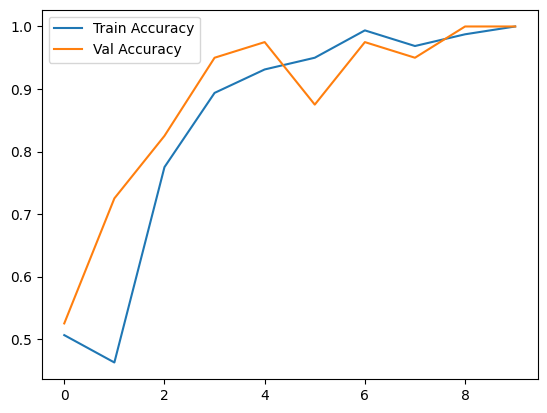

In [14]:
## Section 6: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [19]:
## Section 8: Test Model on New Images
## Section 8: Test Model on New Images
def predict_qr_code(image_path, model):
    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load image - {image_path}")
        return
    
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize
    prediction = model.predict(image)[0][0]
    label = "First Print (Original)" if prediction < 0.5 else "Second Print (Counterfeit)"
    print(f"Prediction: {label}")


# Example usage
test_image_path = "./../Data/first_print/input_image_active.png"
predict_qr_code(test_image_path, model)

1/1 [==============================] - 0s 21ms/step
Prediction: First Print (Original)


In [20]:
## Section 5: Save Model
model.save("qr_code_authentication_model.h5")